In [278]:
import numpy as np
import riverswim_class as rs 
import UCRL2_L as ucrl
import UCRL_SMDP as ucrlS
import experiment_utils as utils
import importlib
importlib.reload(rs)
importlib.reload(ucrl)
importlib.reload(ucrlS)
importlib.reload(utils)
import matplotlib.pyplot as plt

In [279]:
env_smdp = rs.riverswim(nS=15, T_max=5)
env_ucrl = rs.riverswim(nS=15, T_max=1)

ucrl_naive = ucrl.UCRL2(nS=15, nA = 2, delta = 0.0125)
smdp_ucrl = ucrlS.UCRL_SMDP(nS = 15, nA = 2, delta = 0.05, b_r=1,b_tau=1,sigma_r=None, sigma_tau=None, r_max=1,tau_min=1, tau_max=None, T_max = 5 ,imprv = False)
smdp_ucrl_impr = ucrlS.UCRL_SMDP(nS = 15, nA = 2, delta = 0.05, b_r=1,b_tau=1,sigma_r=None, sigma_tau=None, r_max=1,tau_min=1, tau_max=None, T_max = 5,imprv = True)
Bus_ucrl = ucrlS.BUS(nS = 15, nA = 2, delta = 0.05, b_r=1,b_tau=1,sigma_r=None, sigma_tau=None, r_max=1,tau_min=1, tau_max=None, T_max_grid = np.array([2,4,6,8]),imprv=True)
Bus2_ucrl = ucrlS.BUS2(nS = 15, nA = 2, delta = 0.05, b_r=1,b_tau=1,r_max=1,tau_min=1, T_max_grid = np.array([2,4,6,8]),imprv=True)
_,_,_,gstar = utils.VI(env_ucrl,max_iter=10**4, epsilon=10**(-3))
#_,_,_,gstar = utils.VI(env_smdp,max_iter=10**4, epsilon=10**(-3))


In [264]:
reward_ucrl,tau_ucrl = utils.run_experiment(env_ucrl, ucrl_naive, T = 10**6)
print(1)
reward_sucrl,tau_sucrl = utils.run_experiment(env_smdp, smdp_ucrl, T = 10**6)
print(2)
reward_sucrl_imprv,tau_sucrl_imprv = utils.run_experiment(env_smdp, smdp_ucrl_impr, T = 10**6)

1
2
No convergence in EVI after: , 1000,  steps!. Actual diff was 0.33940139922378876, and epsilon = 0.010692894045953066
No convergence in EVI after: , 1000,  steps!. Actual diff was 0.329423350871366, and epsilon = 0.010337884727500772
No convergence in EVI after: , 1000,  steps!. Actual diff was 0.5872544446028769, and epsilon = 0.01008404785545509
No convergence in EVI after: , 1000,  steps!. Actual diff was 0.5872544446028769, and epsilon = 0.009649794811357096
No convergence in EVI after: , 1000,  steps!. Actual diff was 0.9240796907688491, and epsilon = 0.009439424529809984
No convergence in EVI after: , 1000,  steps!. Actual diff was 0.907941882382147, and epsilon = 0.009398894754961404
No convergence in EVI after: , 1000,  steps!. Actual diff was 0.3934912362419709, and epsilon = 0.009341715574892476
No convergence in EVI after: , 1000,  steps!. Actual diff was 1.2244974948862364, and epsilon = 0.009336828035889507
No convergence in EVI after: , 1000,  steps!. Actual diff was 

In [280]:
reward_bus,tau_bus = utils.run_experiment(env_smdp, Bus_ucrl, T = 10**6)
reward_bus2,tau_bus2 = utils.run_experiment(env_smdp, Bus2_ucrl, T = 10**6)

No convergence in EVI after: , 1000,  steps!. Actual diff was 1.1316896080579681, and epsilon = 0.009819980418978566
No convergence in EVI after: , 1000,  steps!. Actual diff was 1.1080980986071154, and epsilon = 0.009404296299662027
No convergence in EVI after: , 1000,  steps!. Actual diff was 1.1080980986071154, and epsilon = 0.008898121359991322
No convergence in EVI after: , 1000,  steps!. Actual diff was 0.7192160609201892, and epsilon = 0.008619088457206343
No convergence in EVI after: , 1000,  steps!. Actual diff was 0.6831419876971268, and epsilon = 0.008464248456559777
No convergence in EVI after: , 1000,  steps!. Actual diff was 3.957023899871274, and epsilon = 0.00877463095775077
No convergence in EVI after: , 1000,  steps!. Actual diff was 2.9554863963494427, and epsilon = 0.008772267329797079
No convergence in EVI after: , 1000,  steps!. Actual diff was 1.0313407872563403, and epsilon = 0.00846121804278016
No convergence in EVI after: , 1000,  steps!. Actual diff was 3.536

In [281]:
regret_ucrl = utils.calc_regret(reward=reward_ucrl, tau = tau_ucrl, optimal_gain=gstar)
regret_sucrl = utils.calc_regret(reward=reward_sucrl, tau = tau_sucrl, optimal_gain=gstar)
regret_sucrl_imprv = utils.calc_regret(reward=reward_sucrl_imprv, tau = tau_sucrl_imprv, optimal_gain=gstar)

regrets_bus = utils.calc_regret(reward=reward_bus, tau = tau_bus, optimal_gain=gstar)
regrets_bus2 = utils.calc_regret(reward=reward_bus2, tau = tau_bus2, optimal_gain=gstar)

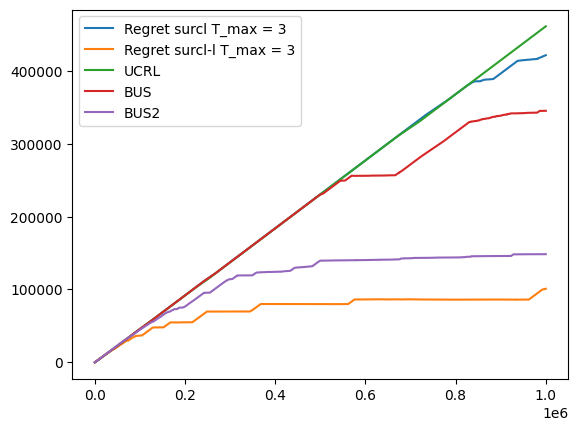

In [282]:
plt.plot(regret_sucrl, label = "Regret surcl T_max = 3")
plt.plot(regret_sucrl_imprv, label = "Regret surcl-l T_max = 3")
plt.plot(regret_ucrl, label = "UCRL")

plt.plot(regrets_bus, label = "BUS")
plt.plot(regrets_bus2, label = "BUS2")
plt.legend()

In [283]:
print("Probs, BUS",Bus_ucrl.current_sample_prop , "Probs, BUS2", Bus2_ucrl.current_sample_prop)


Probs, BUS [0.55147623 0.00453887 0.1245237  0.3194612 ] Probs, BUS2 [0.18805034 0.51448922 0.05473466 0.24272579]
